In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import folium 

In [3]:
Collision = pd.read_csv('Data/Traffic_Collision_Data_2018_to_2022.csv')
Collision.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Location
0,180104039,01/01/2018,01/01/2018,1740,1,Central,192,997,TRAFFIC COLLISION,3101 3401 3701 3009 3025 3036,50.0,F,O,101.0,STREET,VENICE BL,GRAND AV,"(34.0363, -118.2677)"
1,180104668,01/10/2018,01/01/2018,1540,1,Central,182,997,TRAFFIC COLLISION,3101 3401 3701 3004 3030,NaN,M,W,101.0,STREET,VERDUGO RD,YUKON,"(34.042, -118.2625)"
2,180104040,01/01/2018,01/01/2018,1900,1,Central,154,997,TRAFFIC COLLISION,3101 3401 3701 3006 3030 3032,25.0,M,W,108.0,PARKING LOT,SPRING,6TH,"(34.046, -118.2509)"
3,180104001,01/01/2018,01/01/2018,38,1,Central,192,997,TRAFFIC COLLISION,3101 3401 3701 3002 3011 3034 3036,NaN,M,H,101.0,STREET,GRAND,WASHINGTON,"(34.0327, -118.2683)"
4,180104044,01/01/2018,01/01/2018,1030,1,Central,182,997,TRAFFIC COLLISION,3101 3401 3701 3004 3026 3036,33.0,M,B,101.0,STREET,HOPE,PICO,"(34.0395, -118.2656)"


In [4]:
# Import the shapely module from the GeoPandas library.
from shapely.geometry import Point

In [5]:
# Define a function to transform coordinate points.
def parse_location(location_str):
    try:
        lat, lon = map(float, location_str.strip("()").split(", "))
        return Point(lon, lat)
    except:
        return None

In [6]:
# Apply the function
Collision['geometry'] = Collision['Location'].apply(parse_location)

# Remove unneeded lines
Collision = Collision.dropna(subset=['geometry'])

In [7]:
# Convert data into GeoPandas format (geographic data).
#gdf_tracts_vehicle = gpd.GeoDataFrame(tracts_vehicle, geometry='geometry')
gdf_Collision = gpd.GeoDataFrame(Collision, geometry='geometry')

# Set up and harmonize coordinate systems.
#gdf_tracts_vehicle.set_crs(epsg=4326, inplace=True)
gdf_Collision.set_crs(epsg=4326, inplace=True)

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Location,geometry
0,180104039,01/01/2018,01/01/2018,1740,1,Central,192,997,TRAFFIC COLLISION,3101 3401 3701 3009 3025 3036,50.0,F,O,101.0,STREET,VENICE BL,GRAND AV,"(34.0363, -118.2677)",POINT (-118.26770 34.03630)
1,180104668,01/10/2018,01/01/2018,1540,1,Central,182,997,TRAFFIC COLLISION,3101 3401 3701 3004 3030,NaN,M,W,101.0,STREET,VERDUGO RD,YUKON,"(34.042, -118.2625)",POINT (-118.26250 34.04200)
2,180104040,01/01/2018,01/01/2018,1900,1,Central,154,997,TRAFFIC COLLISION,3101 3401 3701 3006 3030 3032,25.0,M,W,108.0,PARKING LOT,SPRING,6TH,"(34.046, -118.2509)",POINT (-118.25090 34.04600)
3,180104001,01/01/2018,01/01/2018,38,1,Central,192,997,TRAFFIC COLLISION,3101 3401 3701 3002 3011 3034 3036,NaN,M,H,101.0,STREET,GRAND,WASHINGTON,"(34.0327, -118.2683)",POINT (-118.26830 34.03270)
4,180104044,01/01/2018,01/01/2018,1030,1,Central,182,997,TRAFFIC COLLISION,3101 3401 3701 3004 3026 3036,33.0,M,B,101.0,STREET,HOPE,PICO,"(34.0395, -118.2656)",POINT (-118.26560 34.03950)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191366,230204688,12/31/2022,12/31/2022,1240,2,Rampart,218,997,TRAFFIC COLLISION,0605 3030 4024,35.0,M,O,101.0,STREET,1500 W SUNSET BL,NaN,"(34.0758, -118.2552)",POINT (-118.25520 34.07580)
191367,230904001,01/01/2023,12/31/2022,2225,9,Van Nuys,964,997,TRAFFIC COLLISION,3038 3602 3101 3004 3026 4026 3029 3037,58.0,M,W,101.0,STREET,WOODMAN AV,ADDISON ST,"(34.1612, -118.4315)",POINT (-118.43150 34.16120)
191368,222019939,12/31/2022,12/31/2022,1240,20,Olympic,2076,997,TRAFFIC COLLISION,3006 3028 3030 4027 3034 3037 3101 3401 3701,22.0,NaN,NaN,101.0,STREET,VERMONT AV,WASHINGTON BL,"(34.04, -118.2916)",POINT (-118.29160 34.04000)
191369,230106871,12/31/2022,12/31/2022,1225,1,Central,162,997,TRAFFIC COLLISION,0605 3030 4024,47.0,M,W,101.0,STREET,W 8TH ST,S OLIVE ST,"(34.0452, -118.2569)",POINT (-118.25690 34.04520)


In [8]:
# Filter out invalid coordinate points
gdf_Collision = gdf_Collision[(gdf_Collision.geometry.x != 0) & (gdf_Collision.geometry.y != 0)]

<Axes: >

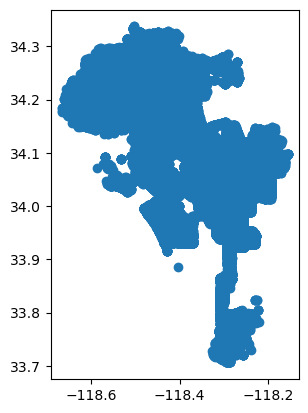

In [10]:
# plot a GeoDataFrame
gdf_Collision.plot()

<Axes: >

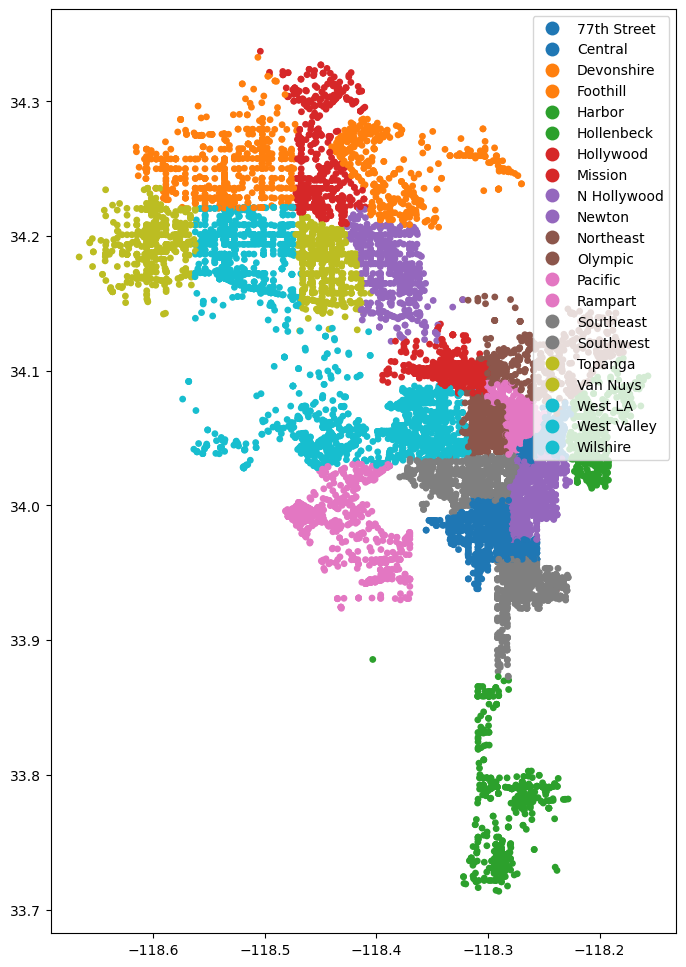

In [22]:
gdf_Collision.sample(13000).plot(
            figsize=(20,12),   #size of the plot (a bit bigger than the default)
            markersize=15,  # Adjust this value to change the size of the dots
            column = 'Area Name',   # column that defines the color of the dots
            legend = True,     # add a legend           
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1)
            }                  # this puts the legend to the side
) 